In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('faa_wildlife_strikes_cleaned.xlsx')
data = data.fillna(0)

In [4]:
data.head()

,Airport Code,Airport name,State,Aircraft Type,Number of Engines,Collision Date and Time,Time of Day Qualifier,Phase of Flight,Amount of Damage,Effect on Flight,Indicated Damage,Time Aircraft Out of Service,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport,Animal Category,Species Order,Species Group,Species
0,KSFO,SAN FRANCISCO INTL ARPT,CA,Airplane,2,2000-01-02 10:27:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Pelicans, Herons, Egrets, Bitterns, Ibises","Herons, Egrets, Bitterns",Snowy egret
1,KPNS,PENSACOLA INTL ARPT,FL,Airplane,2,2000-01-03 14:43:00,Day,Landing Roll,None,None,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,"Crows, Ravens, Jays, Magpies",Crows
2,KCMH,PORT COLUMBUS INTL,OH,Airplane,2,2000-01-05 13:30:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures","Kites, Hawks, Eagles",Red-tailed hawk
3,KGON,GROTON-NEW LONDON AR,CT,Airplane,2,2000-01-05 15:37:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Gulls, terns, kittiwakes",Gulls
4,KJFK,JOHN F KENNEDY INTL,NY,Airplane,4,2000-01-06 15:39:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,Buntings,Snow bunting


In [5]:
data.keys()

Index(['Airport Code', 'Airport name', 'State', 'Aircraft Type',
       'Number of Engines', 'Collision Date and Time', 'Time of Day Qualifier',
       'Phase of Flight', 'Amount of Damage', 'Effect on Flight',
       'Indicated Damage', 'Time Aircraft Out of Service',
       'Cost of Being Out of Service', 'Altitude Above Ground Level',
       'Distance from the Airport', 'Animal Category', 'Species Order',
       'Species Group', 'Species'],
      dtype='object')

In [6]:
data.describe()

,Number of Engines,Time Aircraft Out of Service,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport
count,17699.000000,17699.00000,1.769900e+04,17699.000000,17699.000000
mean,1.997401,7.67905,1.172152e+04,185.730832,0.491149
std,0.330562,110.89954,3.746574e+05,853.394739,2.630027
min,1.000000,0.00000,0.000000e+00,0.000000,0.000000
25%,2.000000,0.00000,0.000000e+00,0.000000,0.000000
50%,2.000000,0.00000,0.000000e+00,0.000000,0.000000
75%,2.000000,0.00000,0.000000e+00,3.000000,0.000000
max,4.000000,6480.00000,4.107158e+07,15000.000000,100.000000


In [7]:
17662 + 37

17699

In [21]:
#Q2: No, 4 engine airplanes are not more lilely that other airplanes to suffer a wildlife strike
airplane_data = data[data["Aircraft Type"] == "Airplane"]
hel_data = data[data["Aircraft Type"] != "Airplane"]
for i in range(1, 5): print(str(i) + " engine airplanes have  " + str(airplane_data[airplane_data["Number of Engines"] == i].shape[0]) + " strikes")


1 engine airplanes have  771 strikes
2 engine airplanes have  16335 strikes
3 engine airplanes have  362 strikes
4 engine airplanes have  194 strikes


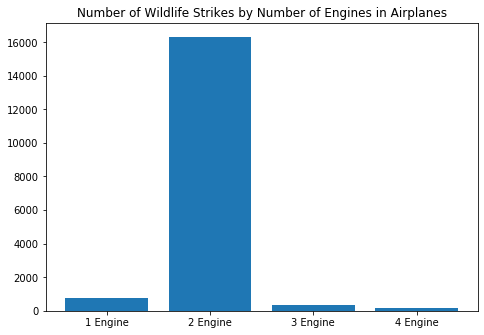

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1 Engine', '2 Engine', '3 Engine', '4 Engine']
students = [771, 16335, 362, 194]
ax.bar(langs,students)
plt.title("Number of Wildlife Strikes by Number of Engines in Airplanes")
plt.show()

In [10]:
#Q3: 3 miles
data["Distance from the Airport"].quantile(.95)

3.0

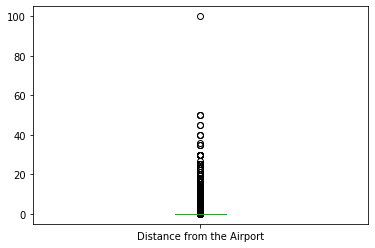

In [11]:
data["Distance from the Airport"].plot.box()

In [12]:
#Q4: Need to ask if I'm understanding the questio right. Confidence interval should be on a series 
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(data["Time of Day Qualifier"].value_counts())
    

(4424.75, -5702.469163501046, 14551.969163501046)

In [13]:
data["Time of Day Qualifier"].value_counts()

Day      13884
Night     2482
Dusk       759
Dawn       574
Name: Time of Day Qualifier, dtype: int64

In [14]:
data["Species Order"].value_counts(normalize=True)

Perching Birds                                    0.409345
Gulls, Terns, Sandpipers, Plovers, Skimmers       0.164247
Pigeons and Doves                                 0.134188
Hawks, Kites, Eagles, Ospreys, Vultures           0.080513
Caracaras, Falcons                                0.052319
Ducks, Geese, Swans, Waterfowl                    0.041358
Owls                                              0.024126
Pelicans, Herons, Egrets, Bitterns, Ibises        0.020736
Canids                                            0.019549
Nightjars, Swifts, Hummingbirds                   0.011752
Deer, Elk, Moose                                  0.011470
Bats                                              0.006215
Rabbits, Hares                                    0.005368
Cranes, Rails, and Coots                          0.004294
Grouse, Quails, Partridges, Pheasants, Turkeys    0.003842
Rodents                                           0.002599
Marsupial                                         0.0016

In [15]:
#Q5: 
#Measures of damage: Amount of Damage, Effect on Flight, Indicated Damage, Time, Cost
order_freq = data["Species Order"].value_counts()
orders = order_freq.index.tolist()
orders_list = []
costs = []
times = []
for order in orders:
    print(order)
    orders_list.append(order)
    order_df = data[data["Species Order"] == order]
    print("Total Incidents: " + str(order_df.shape[0]))
    print(" ")
    print("Amount of Damage: ")
    print(order_df["Amount of Damage"].value_counts())
    print(" ")
    print("Effect on Flight: ")
    print(order_df["Effect on Flight"].value_counts())
    print(" ")
    print("Indicated Damage: ")
    print(order_df["Indicated Damage"].value_counts())
    print(" ")
    print("Time: ")
    time = order_df["Time Aircraft Out of Service"].replace(0, np.NaN).mean()
    print(time)
    times.append(time)
    money = order_df["Cost of Being Out of Service"].replace(0, np.NaN).mean()
    print("Money: ")
    print(money)
    costs.append(money)
    print("-"*80)
    print("-"*80)

Perching Birds
Total Incidents: 7245
 
Amount of Damage: 
None           7111
Minor            77
Substantial      34
Medium           23
Name: Amount of Damage, dtype: int64
 
Effect on Flight: 
None                     6947
Precautionary Landing     144
Aborted Take-off           88
Other                      62
Engine Shut Down            2
0                           2
Name: Effect on Flight, dtype: int64
 
Indicated Damage: 
No damage        7111
Caused damage     134
Name: Indicated Damage, dtype: int64
 
Time: 
14.41638795986622
Money: 
12521.865771812081
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Gulls, Terns, Sandpipers, Plovers, Skimmers
Total Incidents: 2907
 
Amount of Damage: 
None           2654
Minor           125
Substantial      69
Medium           59
Name: Amount of Damage, dtype: int64
 
Effect on Flight: 
None                     2553
Aborted Take-o

Name: Effect on Flight, dtype: int64
 
Indicated Damage: 
Caused damage    1
Name: Indicated Damage, dtype: int64
 
Time: 
2688.0
Money: 
37118.0
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Petrels, Shearwaters
Total Incidents: 1
 
Amount of Damage: 
None    1
Name: Amount of Damage, dtype: int64
 
Effect on Flight: 
None    1
Name: Effect on Flight, dtype: int64
 
Indicated Damage: 
No damage    1
Name: Indicated Damage, dtype: int64
 
Time: 
nan
Money: 
nan
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


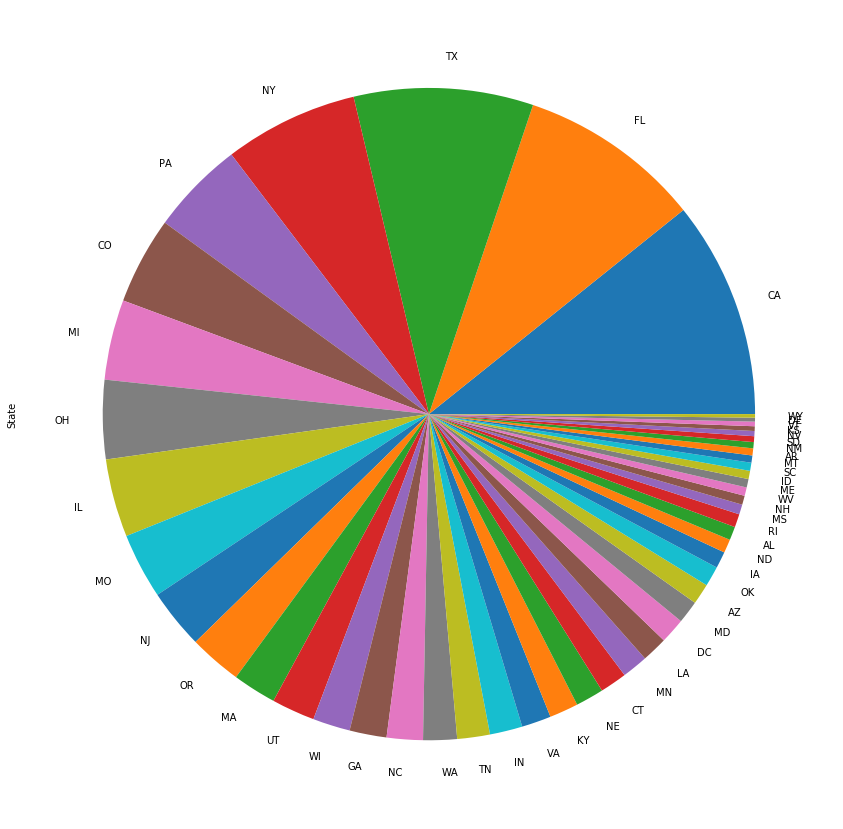

In [16]:
airplane_data["State"].value_counts(normalize="True").plot.pie(figsize=(15, 15))

In [17]:
hel_data["Cost of Being Out of Service"].describe()

NameError: name 'hel_data' is not defined

In [ ]:
airplane_data["Cost of Being Out of Service"].describe()

In [ ]:
#TODO: graph time of day over number of incidetns maybe in intervals of an hour

In [18]:
airplane_data.head()

,Airport Code,Airport name,State,Aircraft Type,Number of Engines,Collision Date and Time,Time of Day Qualifier,Phase of Flight,Amount of Damage,Effect on Flight,Indicated Damage,Time Aircraft Out of Service,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport,Animal Category,Species Order,Species Group,Species
0,KSFO,SAN FRANCISCO INTL ARPT,CA,Airplane,2,2000-01-02 10:27:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Pelicans, Herons, Egrets, Bitterns, Ibises","Herons, Egrets, Bitterns",Snowy egret
1,KPNS,PENSACOLA INTL ARPT,FL,Airplane,2,2000-01-03 14:43:00,Day,Landing Roll,None,None,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,"Crows, Ravens, Jays, Magpies",Crows
2,KCMH,PORT COLUMBUS INTL,OH,Airplane,2,2000-01-05 13:30:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures","Kites, Hawks, Eagles",Red-tailed hawk
3,KGON,GROTON-NEW LONDON AR,CT,Airplane,2,2000-01-05 15:37:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Gulls, terns, kittiwakes",Gulls
4,KJFK,JOHN F KENNEDY INTL,NY,Airplane,4,2000-01-06 15:39:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,Buntings,Snow bunting


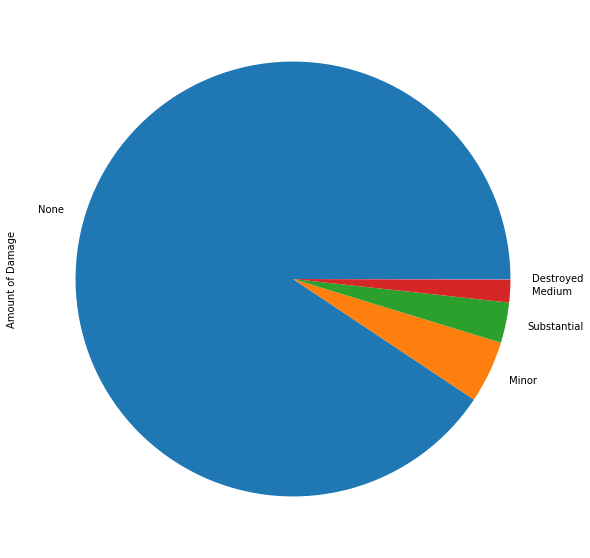

In [40]:
airplane_data["Effect "].value_counts(normalize="true").plot.pie(figsize=(10, 10))

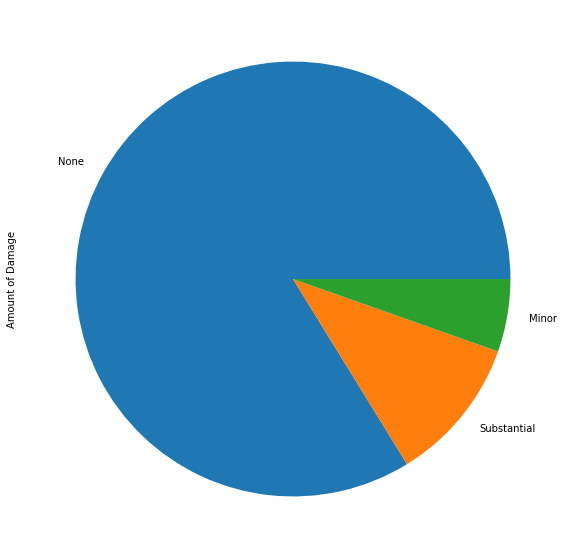

In [41]:
hel_data["Amount of Damage"].value_counts(normalize="true").plot.pie(figsize=(10, 10))

In [22]:
hel_data.head()

,Airport Code,Airport name,State,Aircraft Type,Number of Engines,Collision Date and Time,Time of Day Qualifier,Phase of Flight,Amount of Damage,Effect on Flight,Indicated Damage,Time Aircraft Out of Service,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport,Animal Category,Species Order,Species Group,Species
926,KSCH,SCHENECTADY COUNTY,NY,Helicopter,1,2002-04-17 10:00:00,Day,Landing Roll,None,None,No damage,0.0,0.0,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Gulls, terns, kittiwakes",Laughing gull
1111,KMRB,EASTERN WEST VIRGINIA REGIONAL ARPT,WV,Helicopter,1,2002-08-06 20:15:00,Dusk,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,Swallows and Martins,Swallows
1235,KAPC,NAPA COUNTY ARPT,CA,Helicopter,2,2002-09-25 10:17:00,Day,Take-off run,None,Precautionary Landing,No damage,0.0,0.0,0,0.0,Birds,"Caracaras, Falcons","Caracaras, Falcons",Falcons and Caracaras
1353,KROW,ROSWELL INTL AIR CENTER,NM,Helicopter,1,2003-01-29 16:45:00,Day,Landing Roll,None,Precautionary Landing,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,Other Perching Birds,Perching birds (y)
1895,KTEB,TETERBORO AIRPORT,NJ,Helicopter,2,2004-03-26 16:21:00,Day,Take-off run,None,Precautionary Landing,No damage,0.0,0.0,0,0.0,Birds,"Ducks, Geese, Swans, Waterfowl",Ducks,Mallard


In [42]:
data.head()

,Airport Code,Airport name,State,Aircraft Type,Number of Engines,Collision Date and Time,Time of Day Qualifier,Phase of Flight,Amount of Damage,Effect on Flight,Indicated Damage,Time Aircraft Out of Service,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport,Animal Category,Species Order,Species Group,Species
0,KSFO,SAN FRANCISCO INTL ARPT,CA,Airplane,2,2000-01-02 10:27:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Pelicans, Herons, Egrets, Bitterns, Ibises","Herons, Egrets, Bitterns",Snowy egret
1,KPNS,PENSACOLA INTL ARPT,FL,Airplane,2,2000-01-03 14:43:00,Day,Landing Roll,None,None,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,"Crows, Ravens, Jays, Magpies",Crows
2,KCMH,PORT COLUMBUS INTL,OH,Airplane,2,2000-01-05 13:30:00,Day,Take-off run,None,None,No damage,0.0,0.0,0,0.0,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures","Kites, Hawks, Eagles",Red-tailed hawk
3,KGON,GROTON-NEW LONDON AR,CT,Airplane,2,2000-01-05 15:37:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Gulls, terns, kittiwakes",Gulls
4,KJFK,JOHN F KENNEDY INTL,NY,Airplane,4,2000-01-06 15:39:00,Day,Take-off run,None,Aborted Take-off,No damage,0.0,0.0,0,0.0,Birds,Perching Birds,Buntings,Snow bunting


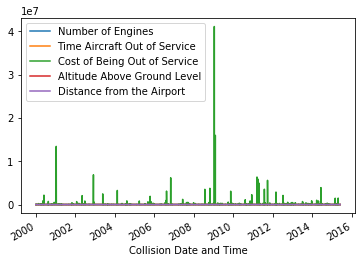

In [43]:
data.set_index("Collision Date and Time").plot()

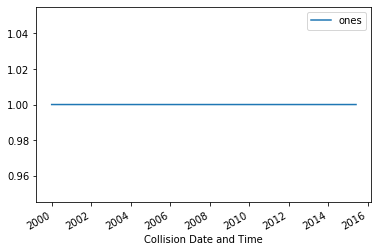

In [44]:
data["ones"] = 1
data.plot(x="Collision Date and Time", y="ones")

In [45]:
data["Collision Date and Time"].unique

<bound method Series.unique of 0       2000-01-02 10:27:00
1       2000-01-03 14:43:00
2       2000-01-05 13:30:00
3       2000-01-05 15:37:00
4       2000-01-06 15:39:00
                ...        
17694   2015-05-31 09:20:00
17695   2015-05-31 16:14:00
17696   2015-05-31 16:45:00
17697   2015-05-31 18:30:00
17698   2015-05-31 21:47:00
Name: Collision Date and Time, Length: 17699, dtype: datetime64[ns]>

In [60]:
from datetime import datetime
#isolate 1 columnn for the hour
d = datetime.strptime(str(data.iloc[1][5]), '%Y-%m-%d %H:%M:%S')
print(d)

def parse_time(timestamp):
    d = datetime.strptime(str(timestamp), '%Y-%m-%d %H:%M:%S')
    return int(d.hour)
data["hour"] = data["Collision Date and Time"].apply(parse_time)

2000-01-03 14:43:00


In [61]:
data.head()

,Airport Code,Airport name,State,Aircraft Type,Number of Engines,Collision Date and Time,Time of Day Qualifier,Phase of Flight,Amount of Damage,Effect on Flight,...,Cost of Being Out of Service,Altitude Above Ground Level,Distance from the Airport,Animal Category,Species Order,Species Group,Species,ones,time,hour
0,KSFO,SAN FRANCISCO INTL ARPT,CA,Airplane,2,2000-01-02 10:27:00,Day,Take-off run,None,None,...,0.0,0,0.0,Birds,"Pelicans, Herons, Egrets, Bitterns, Ibises","Herons, Egrets, Bitterns",Snowy egret,1,[10],10
1,KPNS,PENSACOLA INTL ARPT,FL,Airplane,2,2000-01-03 14:43:00,Day,Landing Roll,None,None,...,0.0,0,0.0,Birds,Perching Birds,"Crows, Ravens, Jays, Magpies",Crows,1,[14],14
2,KCMH,PORT COLUMBUS INTL,OH,Airplane,2,2000-01-05 13:30:00,Day,Take-off run,None,None,...,0.0,0,0.0,Birds,"Hawks, Kites, Eagles, Ospreys, Vultures","Kites, Hawks, Eagles",Red-tailed hawk,1,[13],13
3,KGON,GROTON-NEW LONDON AR,CT,Airplane,2,2000-01-05 15:37:00,Day,Take-off run,None,Aborted Take-off,...,0.0,0,0.0,Birds,"Gulls, Terns, Sandpipers, Plovers, Skimmers","Gulls, terns, kittiwakes",Gulls,1,[15],15
4,KJFK,JOHN F KENNEDY INTL,NY,Airplane,4,2000-01-06 15:39:00,Day,Take-off run,None,Aborted Take-off,...,0.0,0,0.0,Birds,Perching Birds,Buntings,Snow bunting,1,[15],15


In [62]:
data["hour"]

0        10
1        14
2        13
3        15
4        15
         ..
17694     9
17695    16
17696    16
17697    18
17698    21
Name: hour, Length: 17699, dtype: int64

In [83]:
counts = data["hour"].value_counts()

In [84]:
x = [i for i in range(24)]
y = []
for i in range(24):
    try:
        y.append(counts[i])
    except:
        pass
x.remove(12)

In [85]:
y

[888,
 67,
 49,
 25,
 73,
 161,
 803,
 1498,
 1603,
 1530,
 1385,
 1147,
 818,
 737,
 809,
 993,
 1119,
 1096,
 919,
 765,
 501,
 416,
 297]

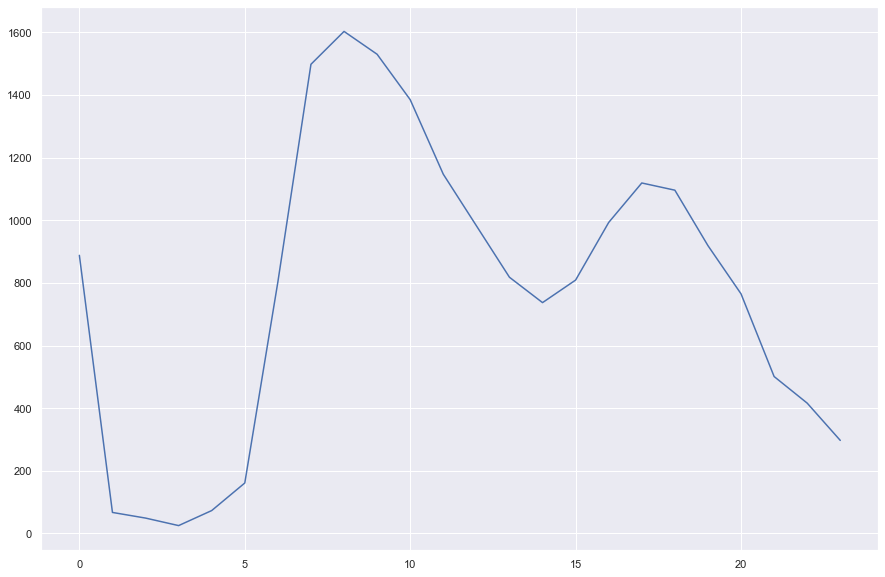

In [82]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(data=counts)